In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Sonar.csv')

# Display the first few rows of the dataset
df.head() 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


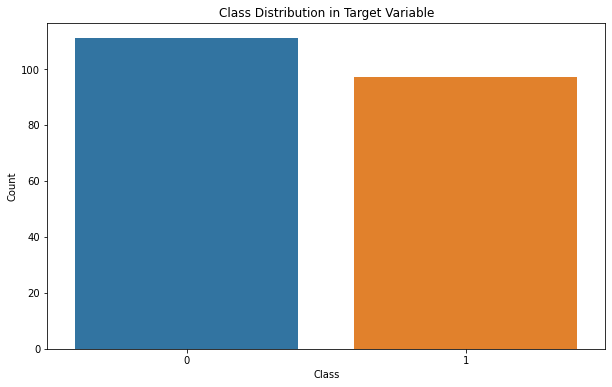

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Class' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Class')
plt.title("Class Distribution in Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [4]:
# Separating features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Display the shape of X and y
X.shape, y.shape


((208, 60), (208,))

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80-20 split)
xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape


((166, 60), (42, 60), (166,), (42,))

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time

# Initializing the classifiers
lr = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Creating a dictionary to hold the results
results = {}

# List of classifiers
classifiers = [('Logistic Regression', lr), ('SVM', svm), ('Decision Tree', dt)]

# K-fold cross-validation
for name, clf in classifiers:
    start_time = time.time()
    
    # Training the model using k-fold cross-validation (k=5)
    cv_scores = cross_val_score(clf, xtrain, ytrain, cv=5)
    
    # Predicting on the test set
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    y_proba = clf.predict_proba(Xtest)[:, 1]
    
    # Computing the metrics
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_proba)
    
    # Computing the computational time
    comp_time = time.time() - start_time
    
    # Storing the results in the dictionary
    results[name] = [cv_scores.mean(), accuracy, precision, recall, roc_auc, comp_time]

# Displaying the results
results


{'Logistic Regression': [0.7534759358288771,
  0.7857142857142857,
  0.6666666666666666,
  0.875,
  0.9375,
  0.07387733459472656],
 'SVM': [0.7411764705882353,
  0.8333333333333334,
  0.7368421052631579,
  0.875,
  0.9158653846153847,
  0.05851387977600098],
 'Decision Tree': [0.7468805704099821,
  0.7142857142857143,
  0.6111111111111112,
  0.6875,
  0.7091346153846154,
  0.03799915313720703]}

In [7]:
# Creating a DataFrame to hold the results
results_df = pd.DataFrame(results, index=['CV Score (Mean)', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'Computational Time (s)'])

# Display the results DataFrame
results_df


,Logistic Regression,SVM,Decision Tree
CV Score (Mean),0.753476,0.741176,0.746881
Accuracy,0.785714,0.833333,0.714286
Precision,0.666667,0.736842,0.611111
Recall,0.875000,0.875000,0.687500
ROC-AUC,0.937500,0.915865,0.709135
Computational Time (s),0.073877,0.058514,0.037999


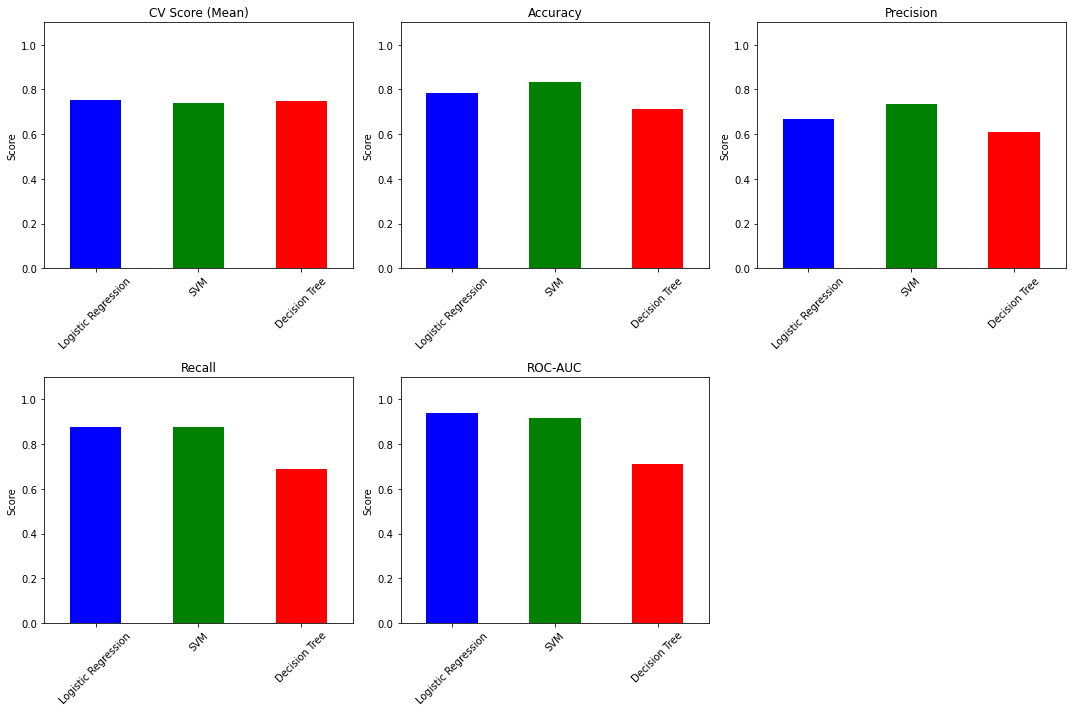

In [8]:
# List of metrics to plot
metrics = ['CV Score (Mean)', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC']

# Plotting the metrics
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    results_df.loc[metric].plot(kind='bar', color=['blue', 'green', 'red'])
    plt.title(metric)
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
